# Task 1: To Explore Supervised Machine Learning

## Analyze Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
df=pd.read_csv("study_data.txt",sep=",")
df.head()
x=df['Hours']
y=df['Scores']
x.dtype
#x=np.array(x)
#x=x.reshape(-1,1)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Text(0, 0.5, 'Scores')

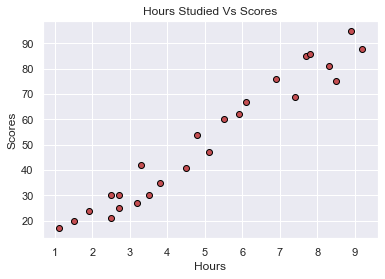

In [6]:
sns.set()
plt.scatter(x,y,c='r',edgecolors='black')
plt.title("Hours Studied Vs Scores")
#plt.xticks(x*60)
#plt.xlim(1,10)
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

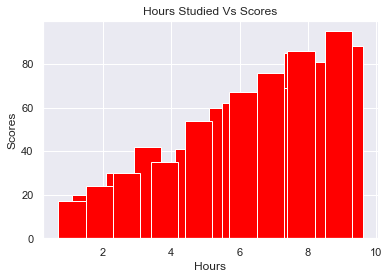

In [7]:
plt.bar(x,y,color='red')
plt.title("Hours Studied Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0.5, 1.0, 'Hours Studied Vs Scores')

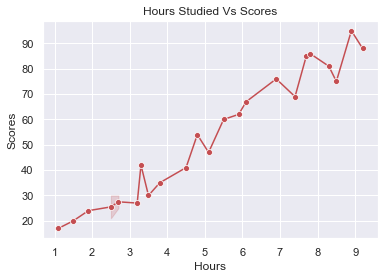

In [8]:
sns.lineplot(x,y,data=df,color='r',marker='o')
plt.title("Hours Studied Vs Scores")

#### Predict value  for

In [9]:
arr=np.array(9.25).reshape(-1,1)

### Splitting data into training and validation set

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
x_train=np.array(x_train)
x_train=x_train.reshape(-1,1)
x_train.shape
y_train.shape
x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)

## Support Vector Regressor

In [11]:
svr=SVR(kernel='linear',C=10,max_iter=100000)
svr.fit(x_train,y_train)
print("Training Score for lasso :",svr.score(x_train,y_train))
print("Test Score for lasso :",svr.score(x_test,y_test))

Training Score for lasso : 0.9475100850535225
Test Score for lasso : 0.8989745912513192


## Lasso Regression

In [12]:
lasso=Lasso(alpha=1,random_state=0,max_iter=100000)
lasso.fit(x_train,y_train)
print("Training Score for lasso :",lasso.score(x_train,y_train))
print("Test Score for lasso :",lasso.score(x_test,y_test))

Training Score for lasso : 0.9527136690693817
Test Score for lasso : 0.9319031148054694


In [13]:
print("Marks obtained after studying for 9.25 hrs :",lasso.predict(arr)[0])

Marks obtained after studying for 9.25 hrs : 92.98890242720462


In [18]:
ypred_lasso=lasso.predict(x_test)
mse=mean_squared_error(y_test,ypred_lasso)
print("Mean Squared Error : ",mse)
me=mean_absolute_error(y_test,ypred_lasso)
print("Mean Absolute Error : ",me)
ypred_train=lasso.predict(x_train)

Mean Squared Error :  31.884474912194587
Mean Absolute Error :  5.178606538083436


In [37]:
ypred_train=ypred_train.reshape(-1,1)
df_lasso=pd.DataFrame(ypred_train,y_train)
df_lasso=df_lasso.reset_index()
df_lasso.columns=['Actual Score','Predicted Score']
df_lasso.loc[15:20]

,Actual Score,Predicted Score
15,60,56.661832
16,30,29.537620
17,75,85.723488
18,21,27.600176
19,54,49.880779
20,95,89.598376


## Ridge Regression

In [218]:
ridge=Ridge(alpha=1,random_state=0)
ridge.fit(x_train,y_train)
print("Training Score for ridge :",ridge.score(x_train,y_train))
print("Test Score  for ridge :",ridge.score(x_test,y_test))


Training Score for ridge : 0.952934667726289
Test Score  for ridge : 0.9308485898845599


In [220]:
print("Marks obtained after studying for 9.25 hrs :",ridge.predict(arr)[0])

Marks obtained after studying for 9.25 hrs : 93.37085869759389


In [225]:
ypred_ridge=ridge.predict(x_test)
mse=mean_squared_error(y_test,ypred_ridge)
print("Mean Squared Error : ",mse)
me=mean_absolute_error(y_test,ypred_ridge)
print("Mean Absolute Error : ",me)

Mean Squared Error :  32.3782269140516
Mean Absolute Error :  5.3012724499470965


## Linear Regression

In [245]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
print("Training Score for linear regression :",lreg.score(x_train,y_train))
print("Test Score  for linear regression :",lreg.score(x_test,y_test))


Training Score for linear regression : 0.9529891020405062
Test Score  for linear regression : 0.9298077534821835


In [246]:
ypred_lreg=lreg.predict(x_test)
mse=mean_squared_error(y_test,ypred_lreg)
print("Mean Squared Error : ",mse)
me=mean_absolute_error(y_test,ypred_lreg)
print("Mean Absolute Error : ",me)

Mean Squared Error :  32.865569647342106
Mean Absolute Error :  5.3994503136120064


 Lasso model has less mean absolute error and also its accuracy is high as compared to other models <br>
 Lasso is best model